#### <i> Assessing the Effectiveness of Machine Learning Models in Predicting Stock Price Movements Of Shell During Energy Crisis </i>
#### <i> Dataset Link --->  https://www.kaggle.com/datasets/pinuto/energy-crisis-and-stock-price-dataset-2021-2024?fbclid=IwZXh0bgNhZW0CMTAAAR2qvTTwto64KdypyqmC1HtYduD8weCe3_Eu77bnGxR2GXve8KYTWaWMUsI_aem_513FPICyNaGm3uQYCpnKQw </i>
#### <i> Import Library Files </i>

In [1]:
# Import necessary libraries
!pip install pandas matplotlib seaborn plotly mplfinance statsmodels

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as mticker
import matplotlib.dates as mpl_dates
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

#### <i> Load The Dataset </i>

In [2]:
data = pd.read_csv("SHEL_data.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,36.250000,36.360001,35.494999,36.029999,31.140999,6794599
1,2021-01-05,37.189999,39.014999,37.115002,38.509998,33.284489,8518589
2,2021-01-06,39.910000,40.680000,39.564999,40.290001,34.822952,9180332
3,2021-01-07,40.000000,40.625000,39.744999,40.340000,34.866161,4829303
4,2021-01-08,40.360001,40.419998,39.770000,40.240002,34.779736,5546750
...,...,...,...,...,...,...,...
972,2024-11-13,65.010002,65.800003,64.459999,65.480003,64.795242,5945070
973,2024-11-14,65.879997,66.120003,65.650002,65.790001,65.101997,5438087
974,2024-11-15,65.489998,65.769997,65.269997,65.470001,65.470001,4349310
975,2024-11-18,66.110001,66.570000,65.915001,66.320000,66.320000,3329354


#### <i> Dataset Ovberview </i>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       977 non-null    object 
 1   Open       977 non-null    float64
 2   High       977 non-null    float64
 3   Low        977 non-null    float64
 4   Close      977 non-null    float64
 5   Adj Close  977 non-null    float64
 6   Volume     977 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 53.6+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,977.000000,977.000000,977.000000,977.000000,977.000000,9.770000e+02
mean,55.961735,56.407882,55.503777,55.968639,52.175158,4.872050e+06
std,10.561569,10.543511,10.552337,10.549633,11.723654,1.728606e+06
min,35.750000,36.360001,35.494999,36.029999,31.140999,7.529140e+05
25%,47.000000,47.549999,46.539101,47.009998,42.006836,3.703752e+06
50%,57.340000,57.779999,56.770000,57.330002,52.582939,4.550720e+06
75%,64.440002,64.820000,63.830002,64.320000,61.728855,5.659883e+06
max,74.290001,74.605003,73.910004,74.169998,72.305870,1.696047e+07


#### <i> Data Visulization And Analysis </i>

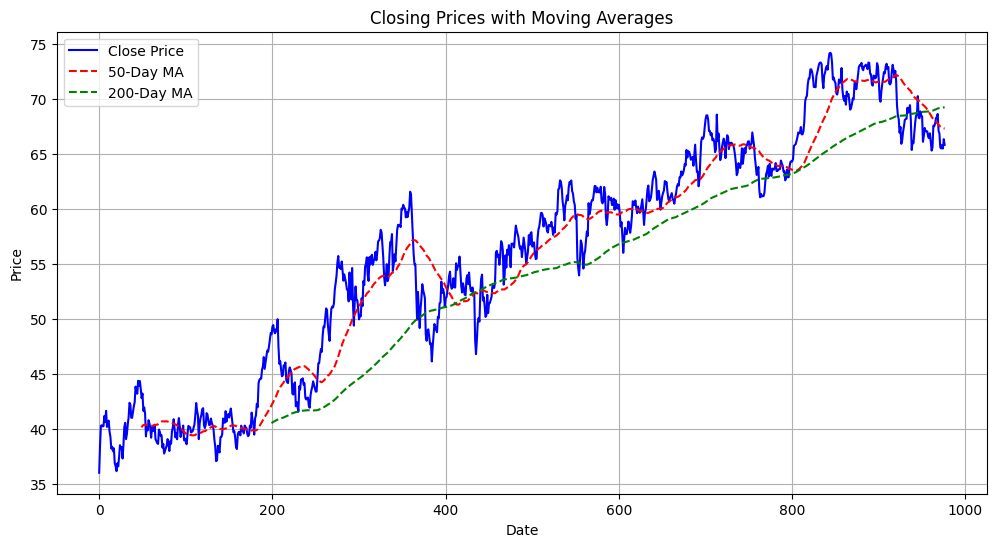

In [5]:
# Moving Averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['MA50'], label='50-Day MA', color='red', linestyle='--')
plt.plot(data.index, data['MA200'], label='200-Day MA', color='green', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

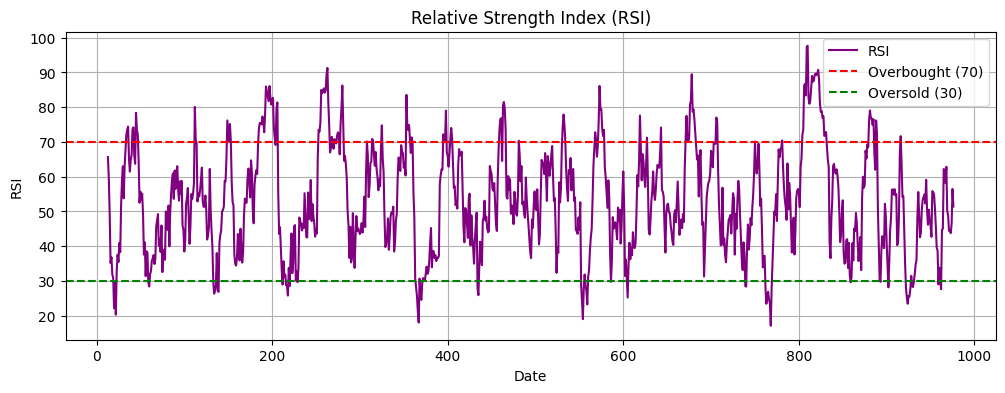

In [6]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = rsi

plt.figure(figsize=(12,4))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()


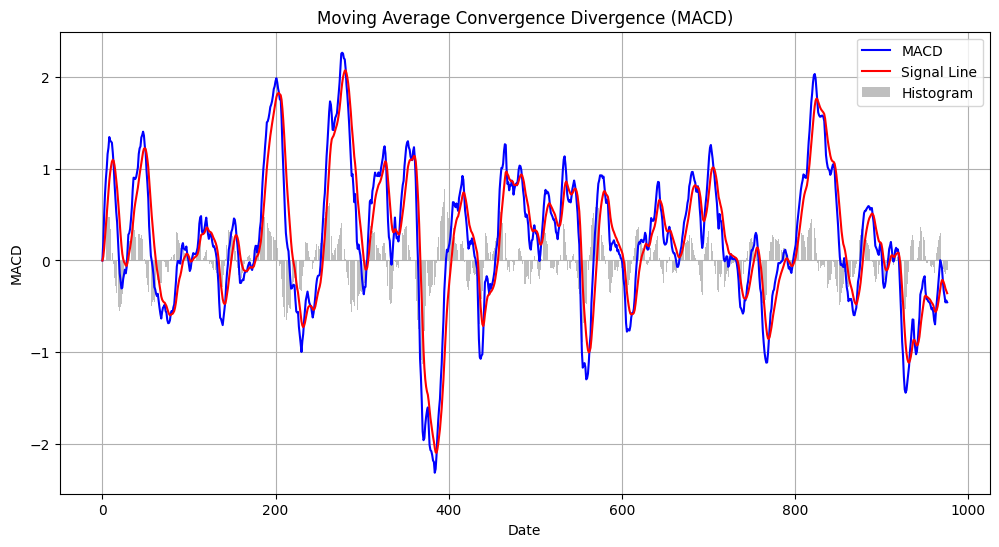

In [7]:
ema_short = data['Close'].ewm(span=12, adjust=False).mean()
ema_long = data['Close'].ewm(span=26, adjust=False).mean()
macd = ema_short - ema_long
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

data['MACD'] = macd
data['MACD_Signal'] = signal
data['MACD_Hist'] = histogram

plt.figure(figsize=(12,6))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Hist'], label='Histogram', color='grey', alpha=0.5)
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()
plt.show()


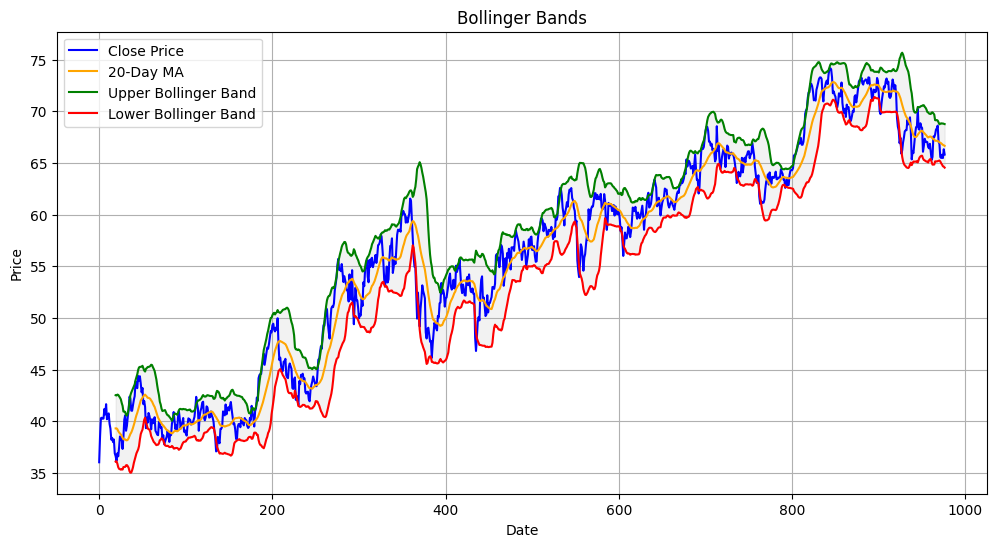

In [8]:
window = 20
no_of_std = 2
data['MA20'] = data['Close'].rolling(window).mean()
data['BB_upper'] = data['MA20'] + (data['Close'].rolling(window).std() * no_of_std)
data['BB_lower'] = data['MA20'] - (data['Close'].rolling(window).std() * no_of_std)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['MA20'], label='20-Day MA', color='orange')
plt.plot(data.index, data['BB_upper'], label='Upper Bollinger Band', color='green')
plt.plot(data.index, data['BB_lower'], label='Lower Bollinger Band', color='red')
plt.fill_between(data.index, data['BB_upper'], data['BB_lower'], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


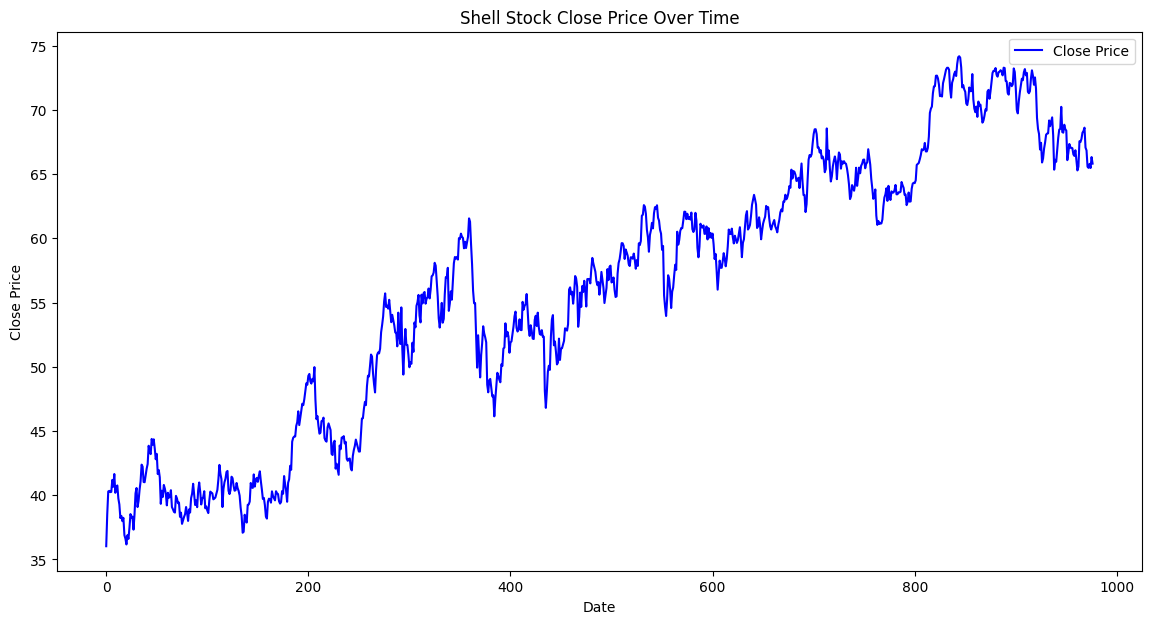

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Shell Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

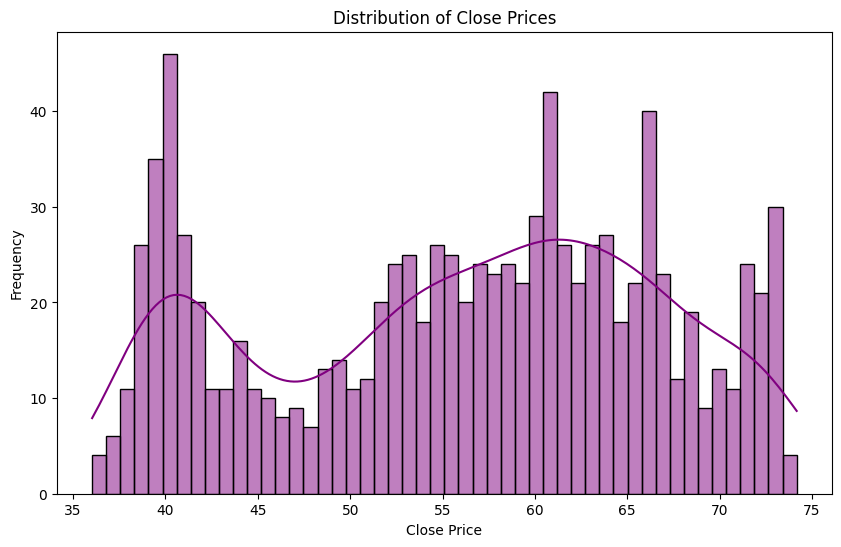

In [10]:
# Distribution of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True, bins=50, color='purple')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

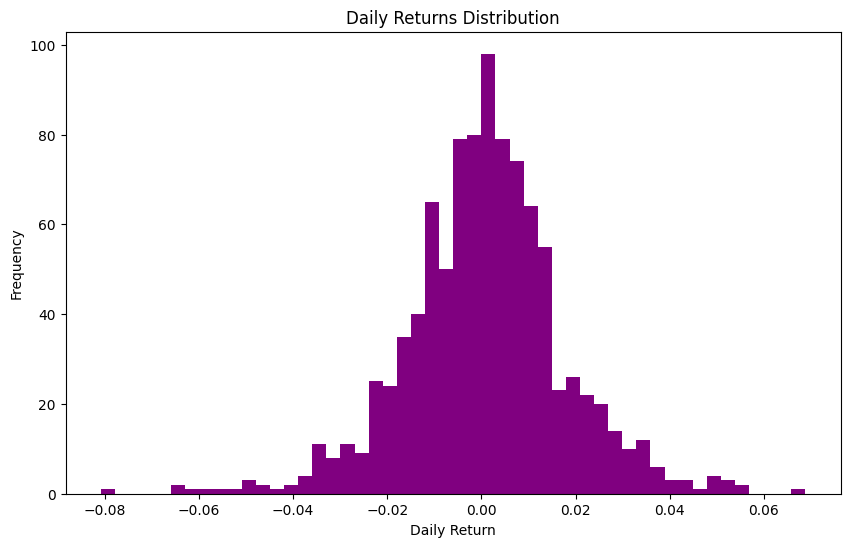

In [11]:
# Daily Returns Histogram
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(10, 6))
data['Daily Return'].hist(bins=50, color='purple')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()


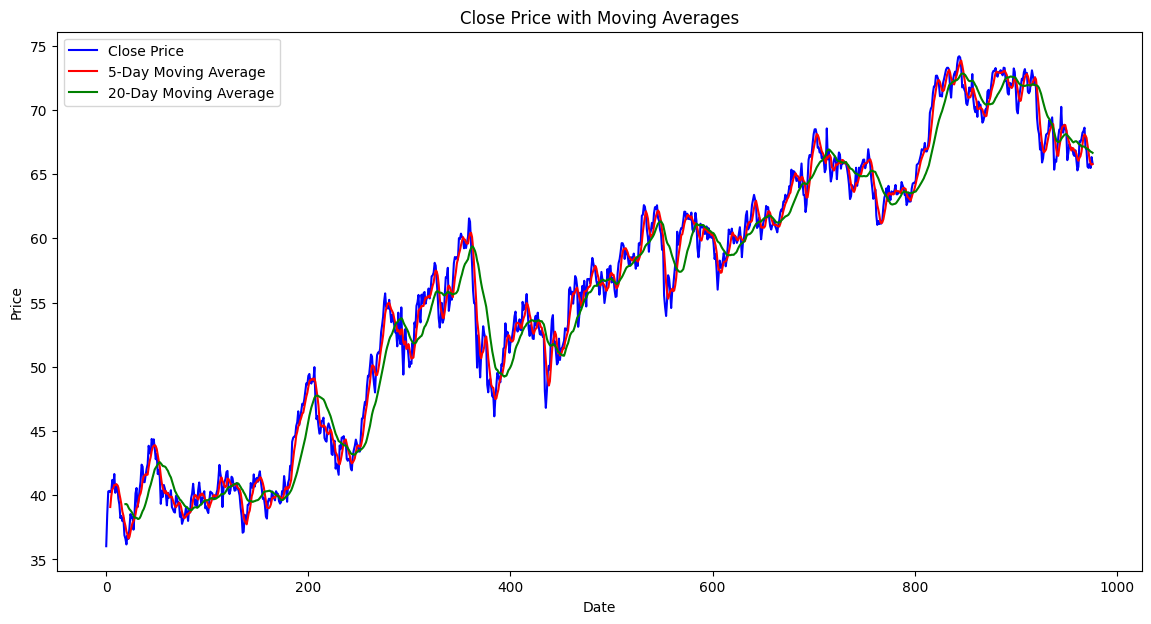

In [12]:
# Moving Averages Visualization
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA_5'], label='5-Day Moving Average', color='red')
plt.plot(data['MA_20'], label='20-Day Moving Average', color='green')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

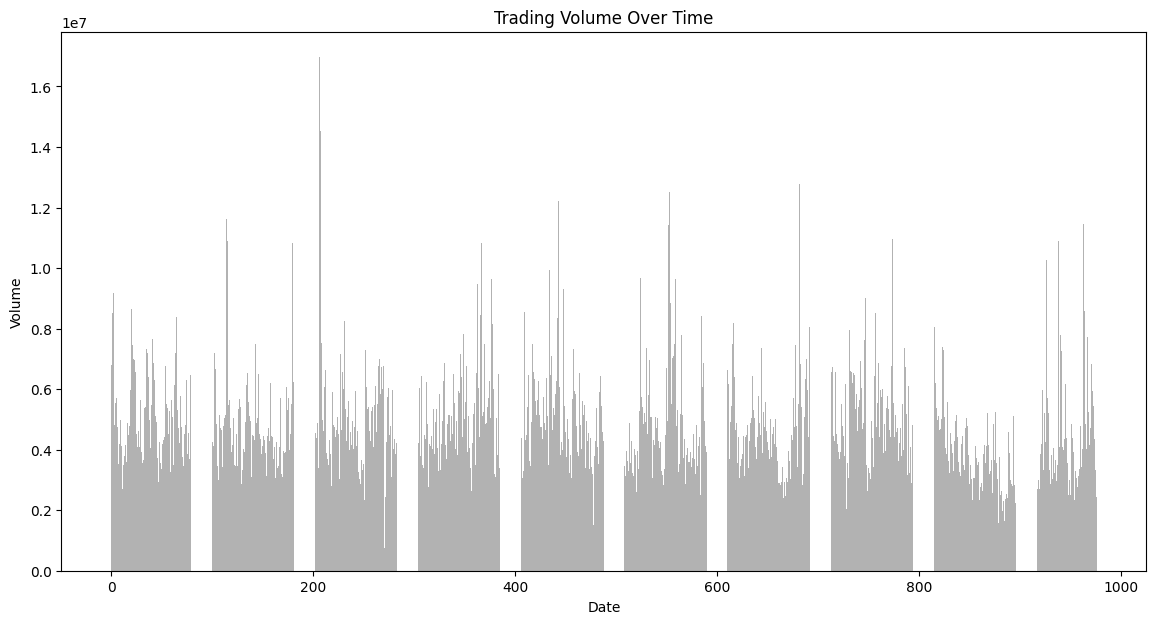

In [13]:
# Volume Analysis
plt.figure(figsize=(14, 7))
plt.bar(data.index, data['Volume'], color='grey', alpha=0.6)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### <i> Data Preprocessing </i>

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Drop rows with missing values (optional: use imputation if needed)
data.dropna(inplace=True)

# Feature Engineering
# Add a column for daily price change
data['Price_Change'] = data['Close'] - data['Open']

# Add a column for percentage price change
data['Pct_Change'] = (data['Price_Change'] / data['Open']) * 100

# Add moving averages (5-day and 20-day)
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

# Drop rows with NaN values generated by moving averages
data.dropna(inplace=True)

# Define a binary classification target: Up (1) if the next day's Close is higher, Down (0) otherwise
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Pct_Change', 'MA_5', 'MA_20']]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values per column:
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
MA50             49
MA200           199
RSI              13
MACD              0
MACD_Signal       0
MACD_Hist         0
MA20             19
BB_upper         19
BB_lower         19
Daily Return      1
MA_5              4
MA_20            19
dtype: int64


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [15]:
# Apply Classification Algorithms
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Report:")
print(classification_report(y_test, lr_preds))
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.51      1.00      0.68        77

    accuracy                           0.51       152
   macro avg       0.75      0.51      0.35       152
weighted avg       0.75      0.51      0.36       152

Logistic Regression Accuracy: 0.51


#### <i> Random Forest Classifier </i>

In [16]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Report:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        75
           1       0.52      0.57      0.55        77

    accuracy                           0.52       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.52      0.52      0.52       152

Random Forest Accuracy: 0.52


#### <i> Support Vector Classifier </i>

In [17]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
svc_preds = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_preds)
print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_preds))
print(f"Support Vector Classifier Accuracy: {svc_accuracy:.2f}")

Support Vector Classifier Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.03        75
           1       0.50      0.97      0.66        77

    accuracy                           0.50       152
   macro avg       0.42      0.49      0.34       152
weighted avg       0.42      0.50      0.35       152

Support Vector Classifier Accuracy: 0.50


#### <i> Comparison Of Models </i>

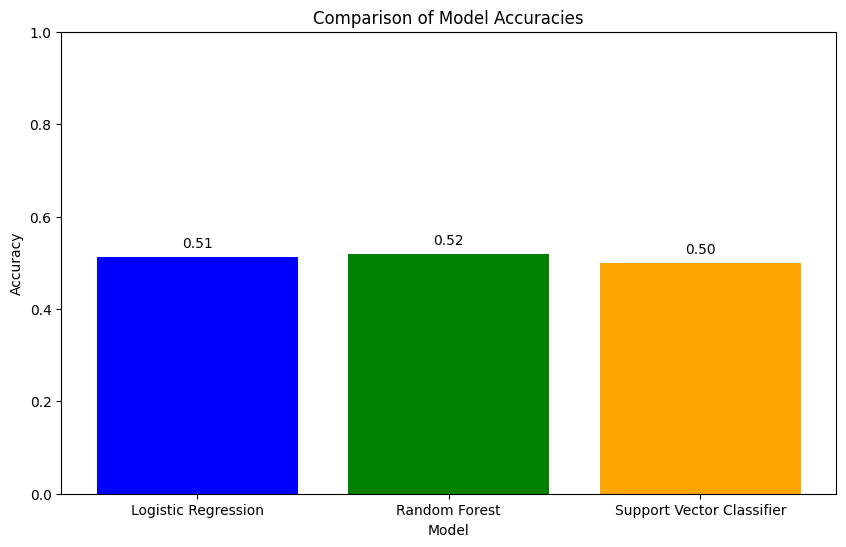

In [18]:
from matplotlib import pyplot as plt

# Visualization of Model Performance
models = ['Logistic Regression', 'Random Forest', 'Support Vector Classifier']
accuracies = [lr_accuracy, rf_accuracy, svc_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()